In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.2      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [1]:
install.packages("tseries")

also installing the dependencies 'xts', 'TTR', 'quadprog', 'zoo', 'quantmod'





  There is a binary version available but the source version is later:
         binary  source needs_compilation
tseries 0.10-51 0.10-52              TRUE

  Binaries will be installed
package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maiky.rodriguez\AppData\Local\Temp\Rtmp8sBtnJ\downloaded_packages


In [2]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
start <- "2016-01-01"
treatment <- "2018-03-17"
end <- "2018-07-17"
 
#retrieve data

Facebook <- get.hist.quote(instrument = "META", start = start, end = end, quote = "Close", compression = "w")

time series ends   2018-07-13


In [7]:
Wallmart <- get.hist.quote(instrument = "WMT", start = start, end = end, quote = "Close", compression = "w")
Disney <- get.hist.quote(instrument = "DIS", start = start, end = end, quote = "Close", compression = "w")
BMW <- get.hist.quote(instrument = "BMW.DE", start = start, end = end, quote = "Close", compression = "w")
Novartis <- get.hist.quote(instrument = "NVS", start = start, end = end, quote = "Close", compression = "w")

time series ends   2018-07-13
time series ends   2018-07-13
time series ends   2018-07-13
time series ends   2018-07-13


In [8]:
#plotting the data
series <- cbind(Facebook, Wallmart, Disney, BMW, Novartis)

In [10]:
series <- na.omit(series)

In [11]:
library(ggplot2)

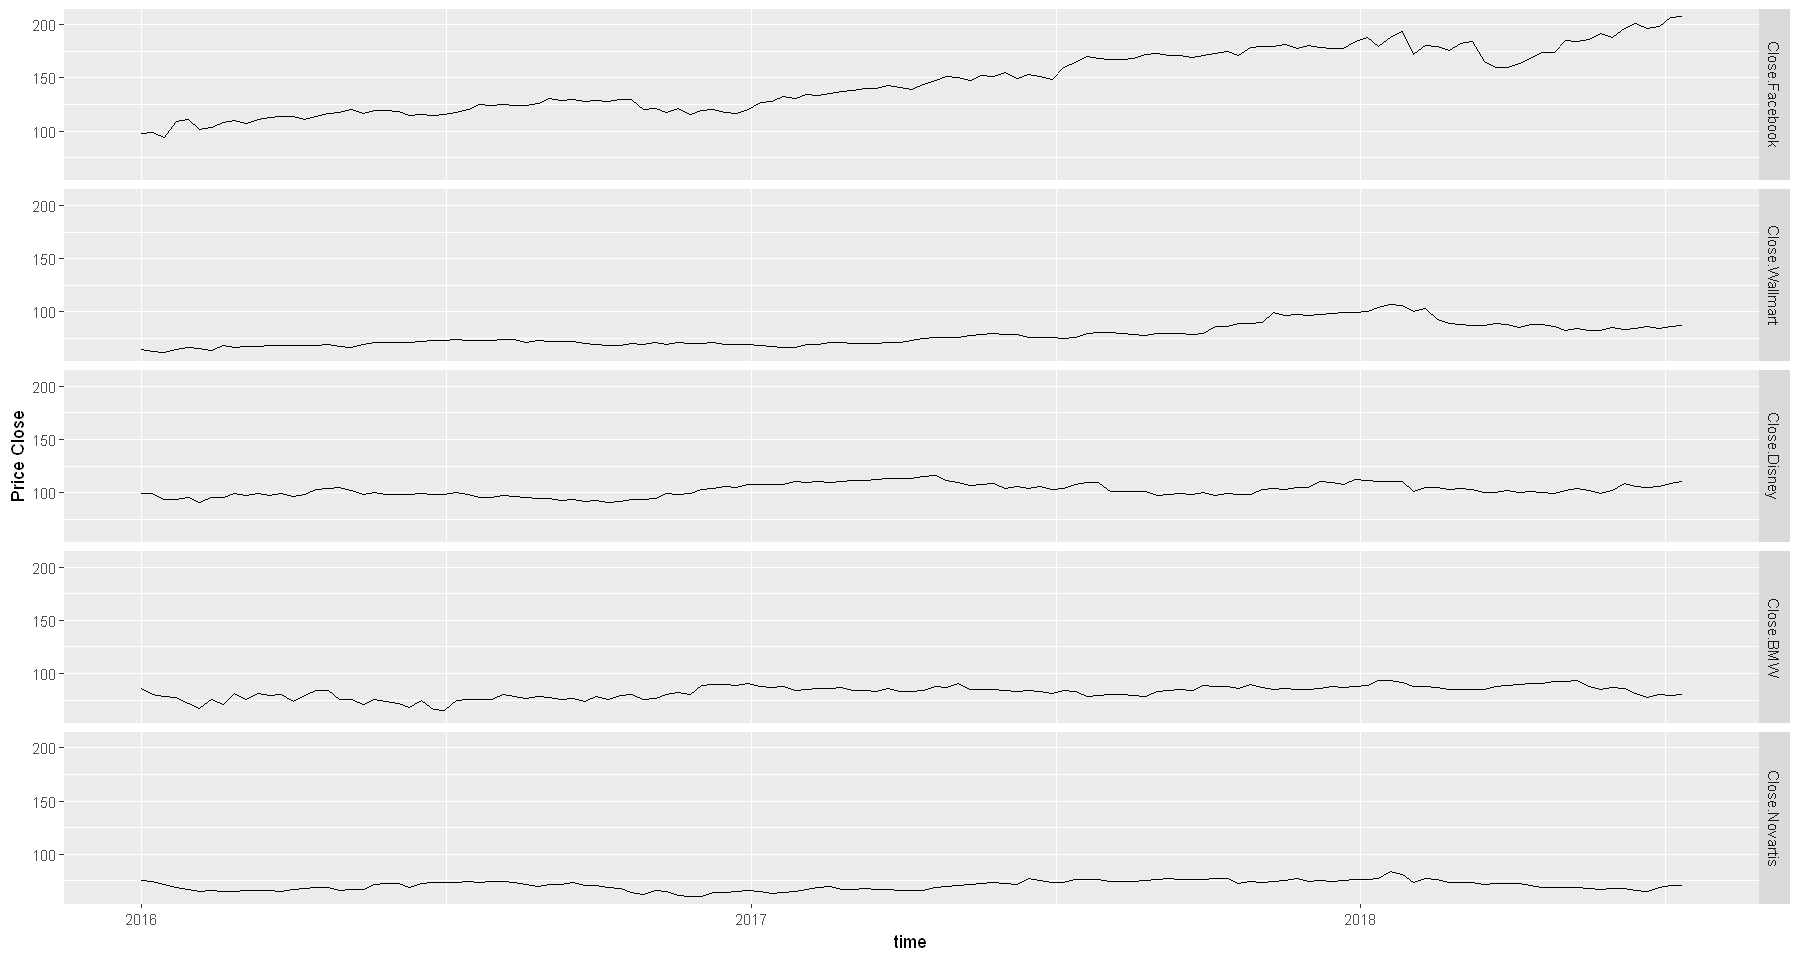

In [17]:
autoplot(series) + xlab("time") + ylab("Price Close")

In [15]:
options(scipen = 999)
options(repr.plot.width=15, repr.plot.height=8)

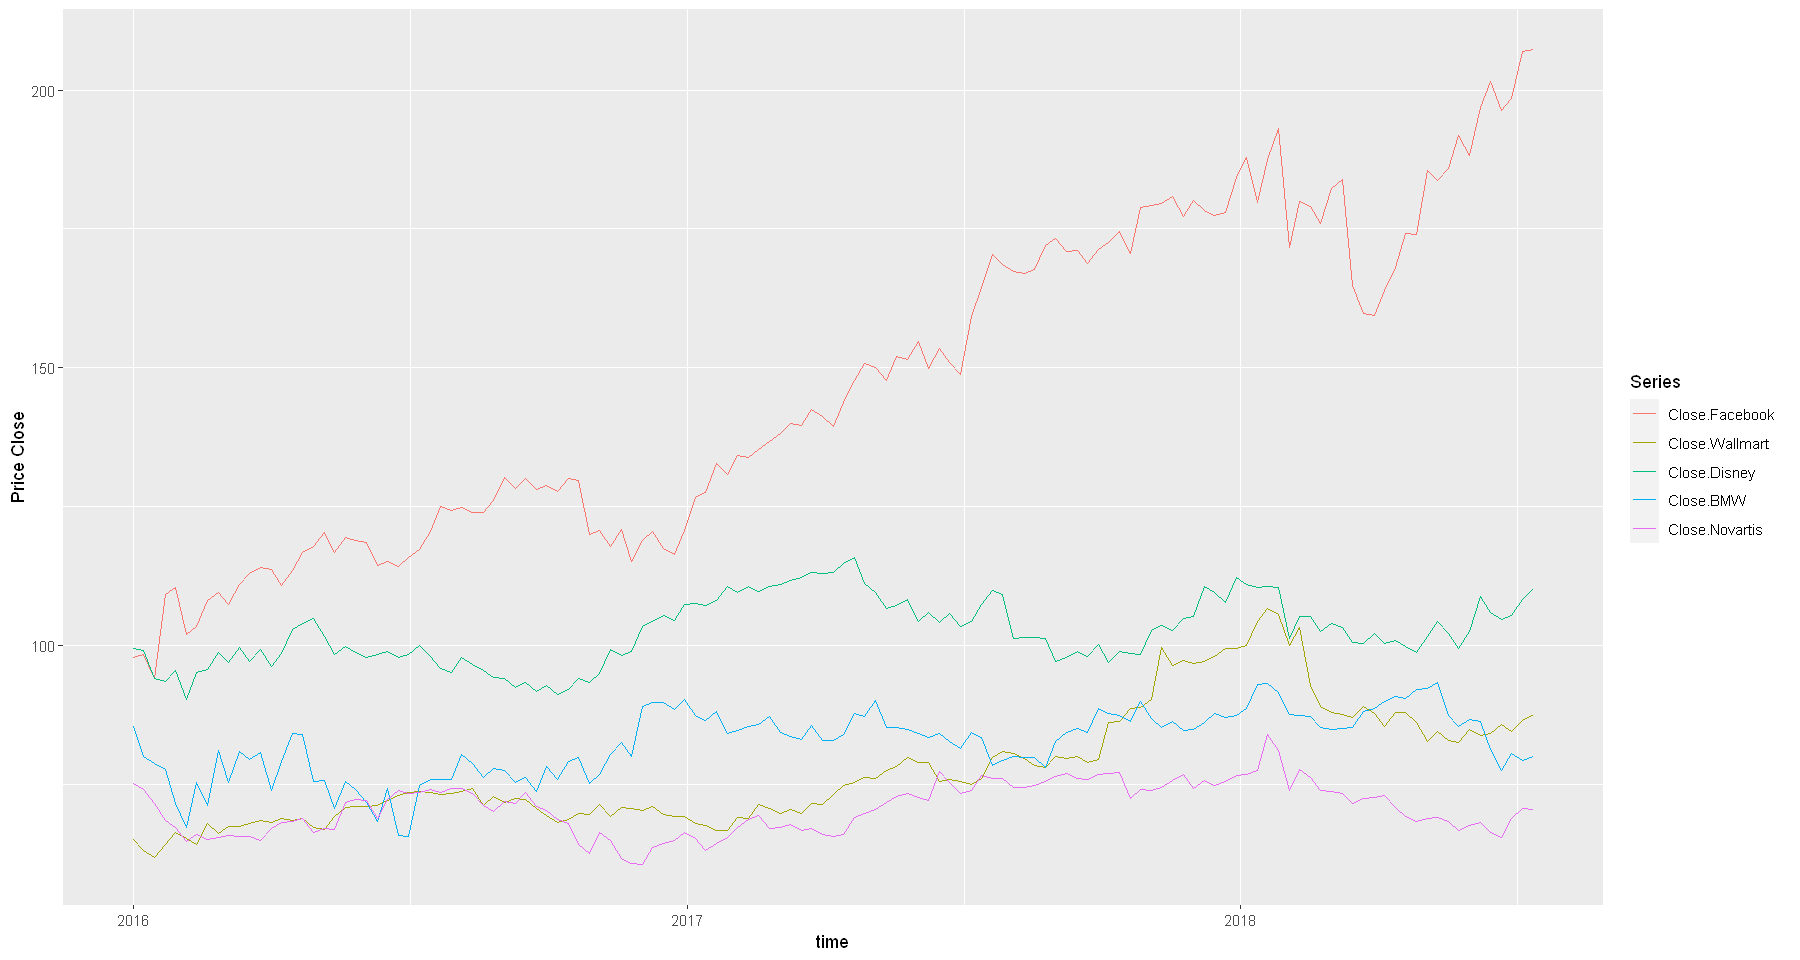

In [16]:
autoplot(series, facet = NULL) + xlab("time") + ylab("Price Close")

In [18]:
#correlation check

data_cor <- window(series, start = start, end = treatment)

In [20]:
data_cor <- as.data.frame(data_cor)

In [21]:
data_cor

,Close.Facebook,Close.Wallmart,Close.Disney,Close.BMW,Close.Novartis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-01,97.92,65.03,99.50,85.44,75.21506
2016-01-08,98.37,63.06,99.11,80.11,74.10394
2016-01-15,94.16,61.88,94.02,78.70,71.55914
2016-01-22,109.11,64.22,93.53,77.62,68.58423
2016-01-29,110.49,66.42,95.43,71.49,67.25806
2016-02-05,101.91,65.32,90.31,67.18,64.69534
2016-02-12,103.47,64.12,95.17,75.35,66.04839
2016-02-19,108.07,68.04,95.65,71.30,65.03584
2016-02-26,109.58,66.14,98.82,81.15,65.36739


In [22]:
cor(data_cor)

,Close.Facebook,Close.Wallmart,Close.Disney,Close.BMW,Close.Novartis
Close.Facebook,1.0000000,0.8810289,0.43481723,0.5949003,0.69695867
Close.Wallmart,0.8810289,1.0000000,0.34285401,0.5193844,0.70262954
Close.Disney,0.4348172,0.3428540,1.00000000,0.6392047,0.08304726
Close.BMW,0.5949003,0.5193844,0.63920465,1.0000000,0.21140152
Close.Novartis,0.6969587,0.7026295,0.08304726,0.2114015,1.00000000


In [23]:
#Getting more data to the control group

Goldman <- get.hist.quote(instrument = "GS", start = start, end = end, quote = "Close", compression = "w")
GE <- get.hist.quote(instrument = "GE", start = start, end = end, quote = "Close", compression = "w")
Heinz <- get.hist.quote(instrument = "KHC", start = start, end = end, quote = "Close", compression = "w")
McDonalds <- get.hist.quote(instrument = "MCD", start = start, end = end, quote = "Close", compression = "w")
Carlsberg <- get.hist.quote(instrument = "CARL-B.CO", start = start, end = end, quote = "Close", compression = "w")


time series ends   2018-07-13
time series ends   2018-07-13
time series ends   2018-07-13
time series ends   2018-07-13
time series ends   2018-07-13


In [24]:
series <- cbind(Facebook, Wallmart, Disney, BMW, Novartis, Goldman, GE, Heinz, McDonalds, Carlsberg)

In [25]:
series <- na.omit(series)

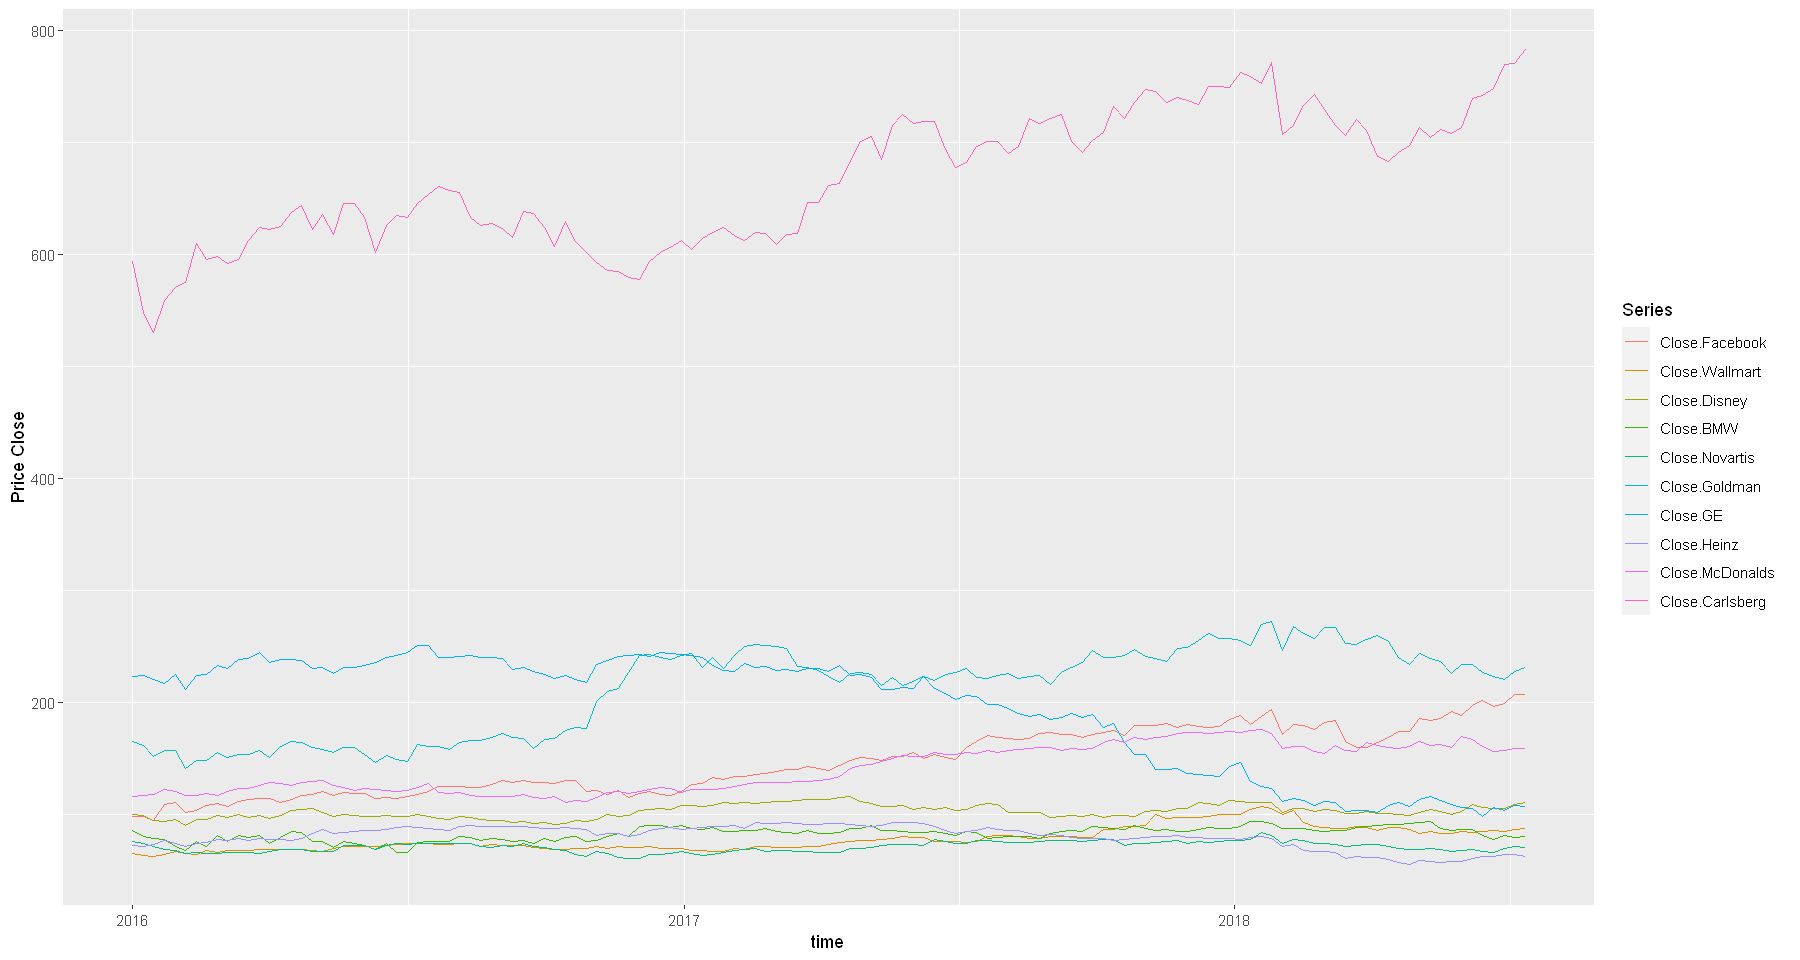

In [26]:
autoplot(series, facet = NULL) + xlab("time") + ylab("Price Close")

In [27]:
data_cor <- window(series, start = start, end = treatment)

In [28]:
data_cor <- as.data.frame(data_cor)

In [29]:
cor(data_cor)

,Close.Facebook,Close.Wallmart,Close.Disney,Close.BMW,Close.Novartis,Close.Goldman,Close.GE,Close.Heinz,Close.McDonalds,Close.Carlsberg
Close.Facebook,1.0000000,0.8810289,0.43481723,0.59490034,0.69695867,0.78975235,-0.8455779,-0.19658473,0.9369196,0.9280856
Close.Wallmart,0.8810289,1.0000000,0.34285401,0.51938443,0.70262954,0.65665102,-0.8962356,-0.33796777,0.8793727,0.8740330
Close.Disney,0.4348172,0.3428540,1.00000000,0.63920465,0.08304726,0.68877878,-0.2277015,0.25740870,0.4336760,0.3922117
Close.BMW,0.5949003,0.5193844,0.63920465,1.00000000,0.21140152,0.83855213,-0.4735721,-0.09036177,0.5690617,0.4971980
Close.Novartis,0.6969587,0.7026295,0.08304726,0.21140152,1.00000000,0.30187348,-0.6288607,-0.20932997,0.7228541,0.7659148
Close.Goldman,0.7897523,0.6566510,0.68877878,0.83855213,0.30187348,1.00000000,-0.6372725,-0.07530632,0.7112245,0.6211197
Close.GE,-0.8455779,-0.8962356,-0.22770153,-0.47357210,-0.62886069,-0.63727251,1.0000000,0.60488077,-0.8426996,-0.7808238
Close.Heinz,-0.1965847,-0.3379678,0.25740870,-0.09036177,-0.20932997,-0.07530632,0.6048808,1.00000000,-0.3159267,-0.1646500
Close.McDonalds,0.9369196,0.8793727,0.43367599,0.56906166,0.72285406,0.71122447,-0.8426996,-0.31592671,1.0000000,0.9234906
Close.Carlsberg,0.9280856,0.8740330,0.39221169,0.49719795,0.76591482,0.62111972,-0.7808238,-0.16464998,0.9234906,1.0000000


In [30]:
#Preparing Dataset to Run Causal Impact
final_series <- cbind(Facebook, Wallmart, Goldman, McDonalds, Carlsberg)

In [31]:
final_series <- na.omit(final_series)

In [32]:
pre.period <- as.Date(c(start, treatment))
post.period <- as.Date(c(treatment, end))

In [35]:
#Running Causal Impact
install.packages("CausalImpact")

also installing the dependencies 'BoomSpikeSlab', 'bsts', 'Boom'




package 'BoomSpikeSlab' successfully unpacked and MD5 sums checked
package 'bsts' successfully unpacked and MD5 sums checked
package 'Boom' successfully unpacked and MD5 sums checked
package 'CausalImpact' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maiky.rodriguez\AppData\Local\Temp\Rtmp8sBtnJ\downloaded_packages


In [36]:
library(CausalImpact)

Loading required package: bsts

Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: 'Boom'


The following object is masked from 'package:stats':

    rWishart



Attaching package: 'BoomSpikeSlab'


The following object is masked from 'package:stats':

    knots


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: 'bsts'


The following object is masked from 'package:BoomSpikeSlab':

    SuggestBurn




In [37]:
impact <- CausalImpact(data = final_series, 
                      pre.period = pre.period, 
                      post.period = post.period,
                      model.args = list(niter = 2000,
                                        nseasons = 52))

Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
"Setting post.period[2] to end of data: 2018-07-13"


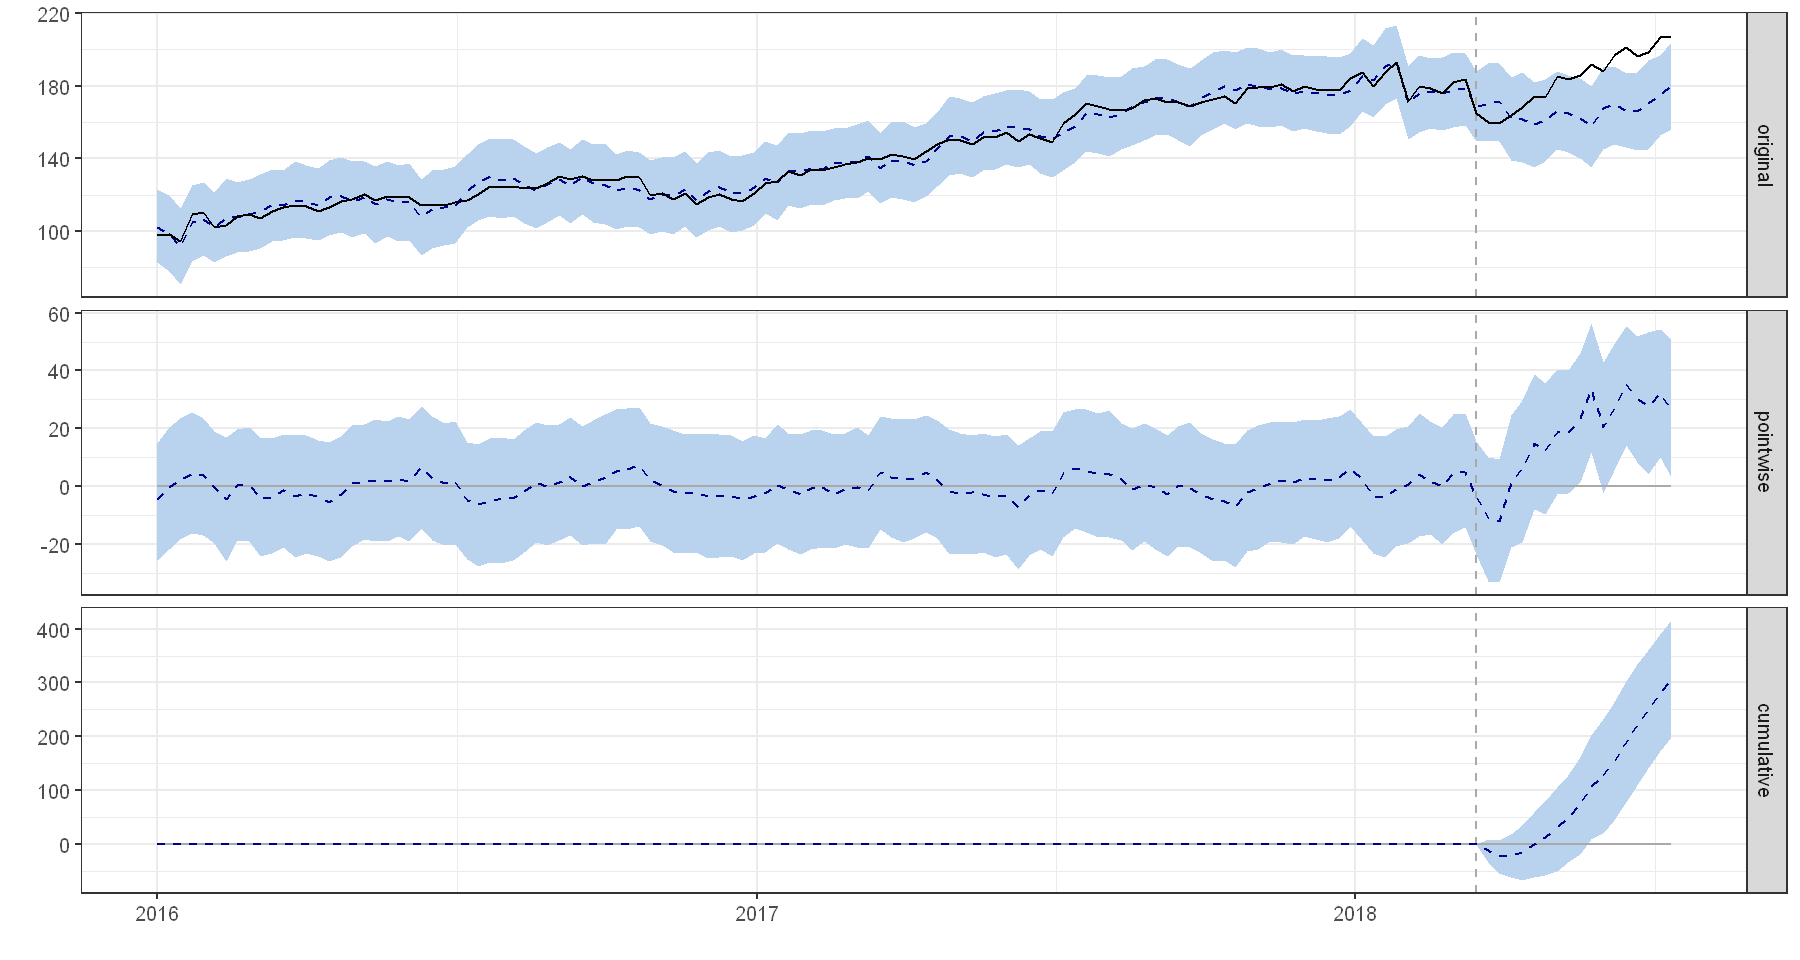

In [38]:
#Visualize results
plot(impact)

In [39]:
summary(impact)

Posterior inference {CausalImpact}

                         Average      Cumulative  
Actual                   185          3142        
Prediction (s.d.)        167 (3.2)    2834 (55.0) 
95% CI                   [160, 173]   [2726, 2943]
                                                  
Absolute effect (s.d.)   18 (3.2)     307 (55.0)  
95% CI                   [12, 24]     [198, 415]  
                                                  
Relative effect (s.d.)   11% (1.9%)   11% (1.9%)  
95% CI                   [7%, 15%]    [7%, 15%]   

Posterior tail-area probability p:   0.00051
Posterior prob. of a causal effect:  99.94934%

For more details, type: summary(impact, "report")



In [40]:
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 184.80. By contrast, in the absence of an intervention, we would have expected an average response of 166.73. The 95% interval of this counterfactual prediction is [160.36, 173.14]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 18.07 with a 95% interval of [11.66, 24.44]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 3.14K. By contrast, had the intervention not taken place, we would have expected a sum of 2.83K. The 95% interval of this prediction is [2.73K, 2.94K].

The above results are given in terms of absolute numbers. In relative terms, the response variable